In [44]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# 실습1. 마켓과 머신러닝

## 생선 분류 문제
- 마켓에 들어온 생선의 크기 정보를 입력하면 자동으로 생선이름 알려주기  
 
 
- 도미에 대한 정보안다면? "30~40cm 길이의 생선은 도미"

 
- 시스템이 스스로 기준을 찾으려면? 

### 도미 데이터 준비하기

In [48]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7,
                31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
                34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0,
                38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0,
                500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0,
                610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0,
                714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

In [49]:
len(bream_length)

35

* 도미의 길이, 무게는 도미의 특징을 나타내는 특성이라고 함.(통계에는 변수라고 부름)
* 특성은 데이터를 표현하는 하나의 성질. feature

### 도미 길이와 무게 데이터에 대한 산점도

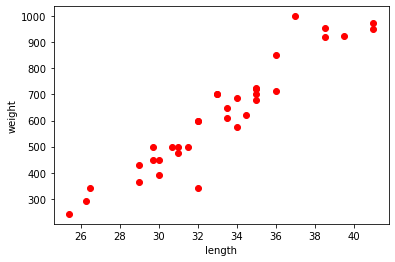

In [50]:
plt.scatter(bream_length, bream_weight, c='red')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 빙어 데이터 준비하기

In [51]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2,
                12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2,
                13.4, 12.2, 19.7, 19.9]

In [52]:
len(smelt_length)

14

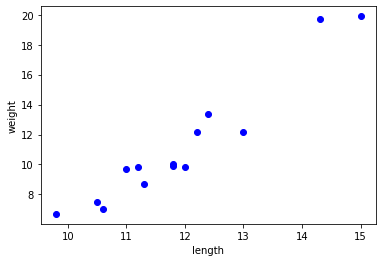

In [53]:
plt.scatter(smelt_length, smelt_weight, c='blue')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 도미 데이터와 빙어 데이터 병합한 산점도

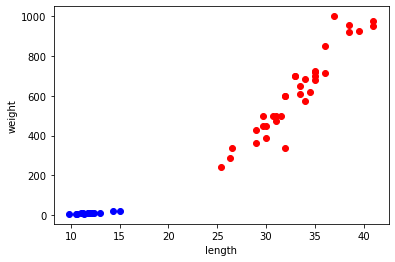

In [54]:
ax1 = plt.scatter(bream_length, bream_weight, c='red')
ax2 = plt.scatter(smelt_length, smelt_weight, c='blue')
plt.legend

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 첫 번째 머신러닝 프로그램

### 두 생선 데이터 병합

In [55]:
# 두 리스트 합치기
length = bream_length + smelt_length # bream_length.extend(smelt_length)
weight = bream_weight + smelt_weight


In [56]:
# 2차원 리스트로 변환

fish_data = [[l, w] for l, w in zip(length, weight)]

In [57]:
fish_data[:5]

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]

### 타겟(레이블) 데이터 생성

In [58]:
fish_target = [1] * 35 + [0] * 14
fish_target

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

## K-최근접 이웃(K-Nearest Neighbor) 알고리즘을 이용한 분류

### K-최근접 이웃(K-Nearest Neighbor) 알고리즘 소개

- 테스트 데이터와 K개 훈련데이터의 y값들을 비교
- 분류와 회귀 모두 활용
    - 분류 : k개 최근접 이웃들의 class들 중 다수결 결과로 class 예측
    - 회귀 : k개 최근접 이웃들이 가지고 있는 값의 평균을 결과값으로 예측

![image.png](../img/image.png)
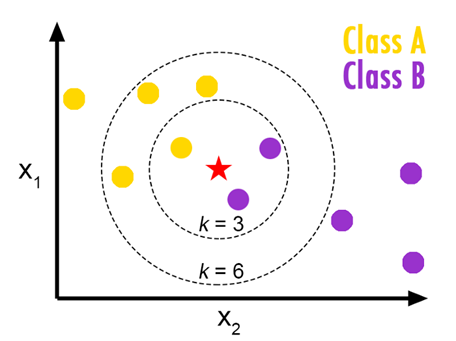

- 비모수방식이며 instance-based 알고리즘

- train과 test 세트로 데이터를 분리하지만 실제로 train은 존재하지 않는 게으른 알고리즘

- 구체적인 데이터를 가지고 예측을 요청할 때, K개 가장 가까운 사례를 train data set에서 찾아 해당하는 데이터의 y 값을 기반으로 예측 결과를 제시

- K 값 : 동점을 막기 위해 대개 홀수로 정함 
    - k가 작으면 이상치 등 노이즈에 민감하게 반응하여 과대적합 
        - k=1인 경우 가장 가까운 이웃과 같은 클래스가 할당됨
    - k가 크면 자료의 패턴을 파악할 수 없어 과소적합
        - k=N인 경우 전체 평균의 개념

- '가깝다'는 판단 기준 : **거리** (맨하탄 거리, 유클리디안 거리, 민코위스키 거리 등)

### 사이킷런의 K-최근접이웃 클래스

In [59]:
# KNeighborsClassifier 모듈 불러오기

**KNeighborsClass 객체 생성**

In [60]:
kn = KNeighborsClassifier()

**훈련(training) : fit(features, label) 메서드**

In [61]:
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

**모델 평가 : score() 메서드 => 정확도**

In [62]:
kn.score(fish_data, fish_target)

1.0

**정확도(accuracy)**

- 정확한 답을 몇개 맞추었는지를 백분율로 나타낸 값
-  $정확히 맞힌 개수 / 전체 데이터수$

### K-최근접 이웃 알고리즘을 이용한 새로운 데이터 분류

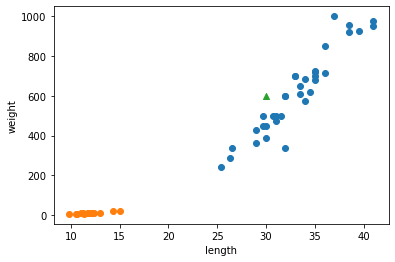

In [65]:
# (30, 600)

plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30, 600, marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [67]:
kn.predict(([30, 600], [50,550], [5,20]))

array([1, 1, 0])

**_fit_X  속성** : fish_data를 가지고 있음

In [72]:
kn._fit_X

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


**_y 속성** : fish_target 을 가지고 있음

In [73]:
kn._y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

**K-neighbors 크기 지정**

In [75]:
kn49 = KNeighborsClassifier(n_neighbors=49)

**K=49인 경우 모델 훈련 및 성능**

In [76]:
kn49.fit(fish_data, fish_target)

KNeighborsClassifier(n_neighbors=49)

In [80]:
kn49.score(fish_data, fish_target)

0.7142857142857143

In [82]:
# k를 49개 설정했기 때문에 모든 예측 값이 도미로 예측됨.
kn49.predict(([30, 600], [50,550], [5,20]))

array([1, 1, 1])

### 확인 문제



1. 가장 가까운 이웃을 참고하여 정답을 예측하는 알고리즘이 구현된 사이킷런 클래스는 무엇인가? 

KNeighborsClassifier

2. 사이킷런 모델을 훈련할 때 사용하는 메서드는 무엇인가?

fit

3. n_neighbors를 49로 설정했을 때 점수가 1.0보다 작았다. 즉, 정확도가 100%가 아니다. n_neigbors의 기본값인 5부터 49까지 바꾸어가며 점수가 1.0 아래로 내려가기 시작하는 이웃의 개수를 찾아보시오.

In [92]:
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)
cnt = 0

for i in range(5, 50):
    kn.n_neighbors = i
    if kn.score(fish_data, fish_target) < 1:
        print(f'k값 : {i}')
        print(kn.score(fish_data, fish_target))
        cnt += 1

print('점수가 1.0 아래로 내려가기 시작하는 이웃의 개수 =', cnt)

k값 : 18
0.9795918367346939
k값 : 19
0.9795918367346939
k값 : 20
0.9795918367346939
k값 : 21
0.9795918367346939
k값 : 22
0.9795918367346939
k값 : 23
0.9795918367346939
k값 : 24
0.9795918367346939
k값 : 25
0.9795918367346939
k값 : 26
0.9795918367346939
k값 : 27
0.9795918367346939
k값 : 28
0.9591836734693877
k값 : 29
0.7142857142857143
k값 : 30
0.7142857142857143
k값 : 31
0.7142857142857143
k값 : 32
0.7142857142857143
k값 : 33
0.7142857142857143
k값 : 34
0.7142857142857143
k값 : 35
0.7142857142857143
k값 : 36
0.7142857142857143
k값 : 37
0.7142857142857143
k값 : 38
0.7142857142857143
k값 : 39
0.7142857142857143
k값 : 40
0.7142857142857143
k값 : 41
0.7142857142857143
k값 : 42
0.7142857142857143
k값 : 43
0.7142857142857143
k값 : 44
0.7142857142857143
k값 : 45
0.7142857142857143
k값 : 46
0.7142857142857143
k값 : 47
0.7142857142857143
k값 : 48
0.7142857142857143
k값 : 49
0.7142857142857143
점수가 1.0 아래로 내려가기 시작하는 이웃의 개수 = 32




### [마무리]

- 특성
- k-최근접 이웃 알고리즘
- 정확도

### 핵심 패키지와 함수
**scikit-learn**

- KNeighborsClassifier()
- fit()
- predict()
- score()